In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare, ks_2samp
import numpy as np

In [2]:
data=pd.read_csv("readmission.csv")
data.shape

(101766, 50)

In [3]:
data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [4]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
data.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


In [8]:
ids = data['encounter_id']
data[ids.isin(ids[ids.duplicated()])]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [9]:
data = data.replace('?', np.NaN )

In [10]:
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())
data = data.replace('Unknown/Invalid', np.NaN )

gender 3


In [11]:
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [12]:
data.drop(['weight','payer_code','medical_specialty','diag_2', 'diag_3'],axis=1,inplace=True)
data.shape

(101766, 45)

In [13]:
data.dropna(inplace=True)
data.shape

(99473, 45)

In [14]:
data[0:3]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO


In [15]:
categorical=data.select_dtypes(include=['object'])
numeric=data.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['race' 'gender' 'age' 'diag_1' 'max_glu_serum' 'A1Cresult' 'metformin'
 'repaglinide' 'nateglinide' 'chlorpropamide' 'glimepiride'
 'acetohexamide' 'glipizide' 'glyburide' 'tolbutamide' 'pioglitazone'
 'rosiglitazone' 'acarbose' 'miglitol' 'troglitazone' 'tolazamide'
 'examide' 'citoglipton' 'insulin' 'glyburide-metformin'
 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']
['encounter_id' 'patient_nbr' 'admission_type_id'
 'discharge_disposition_id' 'admission_source_id' 'time_in_hospital'
 'num_lab_procedures' 'num_procedures' 'num_medications'
 'number_outpatient' 'number_emergency' 'number_inpatient'
 'number_diagnoses']


In [16]:
for col in categorical:
    print(categorical[col].value_counts())

Caucasian          76092
AfricanAmerican    19201
Hispanic            2035
Other               1505
Asian                640
Name: race, dtype: int64
Female    53570
Male      45903
Name: gender, dtype: int64
[70-80)     25464
[60-70)     21981
[50-60)     16894
[80-90)     16796
[40-50)      9463
[30-40)      3699
[90-100)     2724
[20-30)      1610
[10-20)       682
[0-10)        160
Name: age, dtype: int64
428    6739
414    6406
786    3938
410    3518
486    3425
       ... 
148       1
412       1
684       1
318       1
919       1
Name: diag_1, Length: 714, dtype: int64
None    94184
Norm     2570
>200     1466
>300     1253
Name: max_glu_serum, dtype: int64
None    82880
>8       7959
Norm     4904
>7       3730
Name: A1Cresult, dtype: int64
No        79957
Steady    17915
Up         1039
Down        562
Name: metformin, dtype: int64
No        97944
Steady     1375
Up          109
Down         45
Name: repaglinide, dtype: int64
No        98778
Steady      661
Up           23
D

In [17]:
for col in numeric:
    print(numeric[col].value_counts())

116046918    1
431452922    1
151789716    1
97077756     1
146966538    1
            ..
136164312    1
400882502    1
175621458    1
57537876     1
77856768     1
Name: encounter_id, Length: 99473, dtype: int64
88785891     40
43140906     28
23199021     23
88227540     23
1660293      23
             ..
45344997      1
70926237      1
3837366       1
101423232     1
93251151      1
Name: patient_nbr, Length: 69658, dtype: int64
1    52889
3    18502
2    17784
6     5224
5     4727
8      317
7       20
4       10
Name: admission_type_id, dtype: int64
1     58761
3     13611
6     12694
18     3672
2      2060
22     1981
11     1608
5      1142
25      972
4       765
7       610
23      406
13      396
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64
7     56624
1     28845
17     6697
4      2985
6      1989
2      1042
5       8

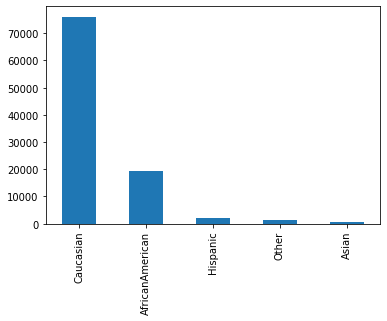

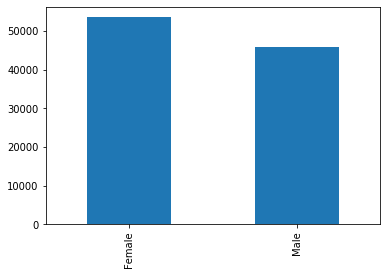

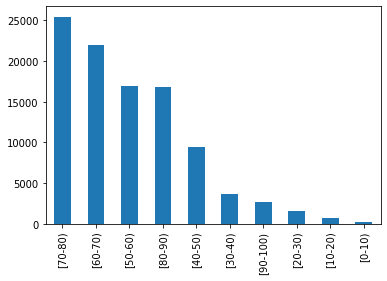

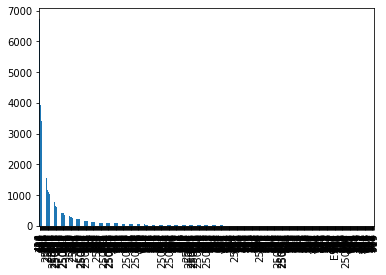

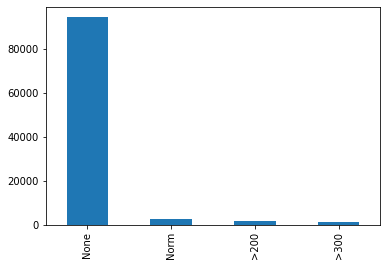

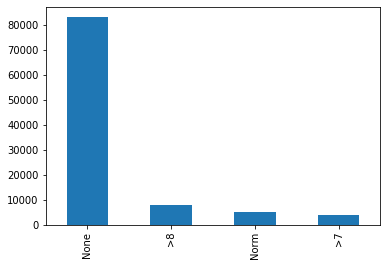

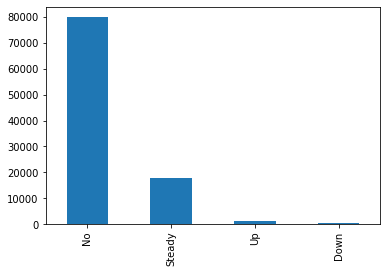

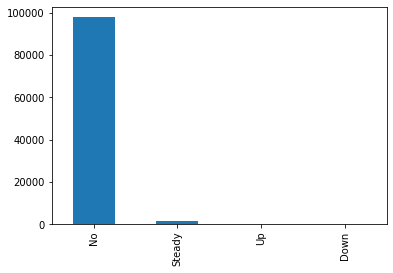

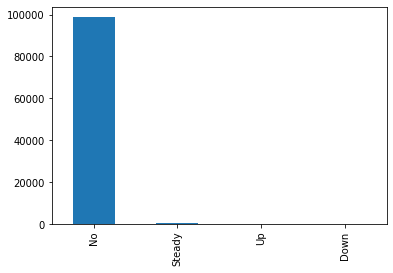

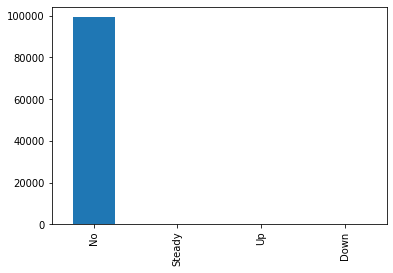

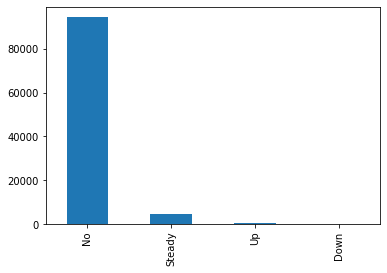

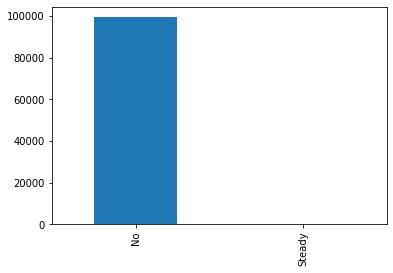

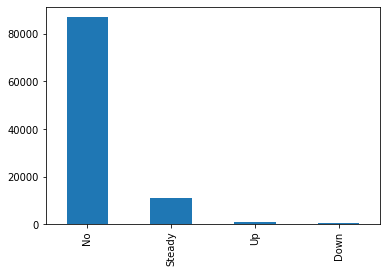

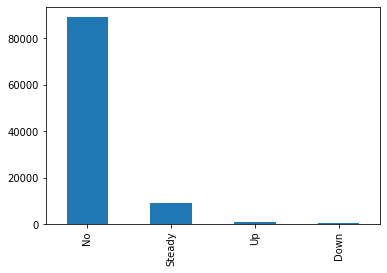

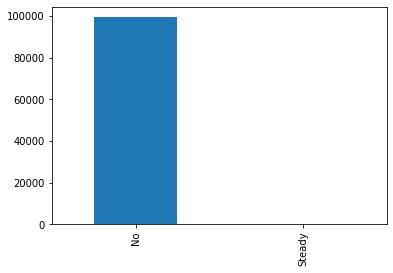

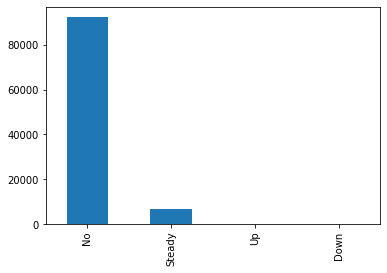

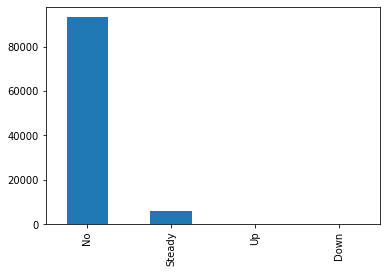

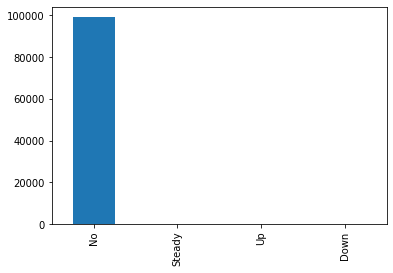

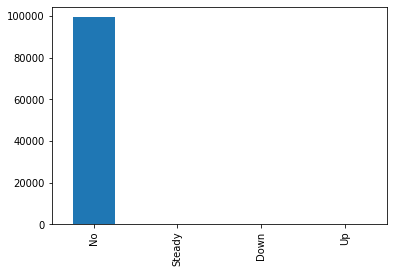

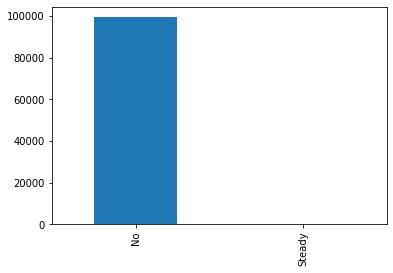

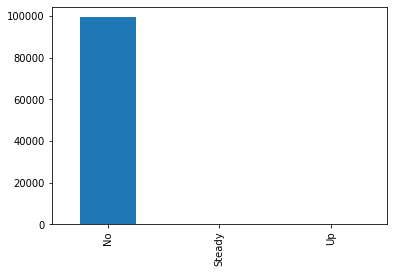

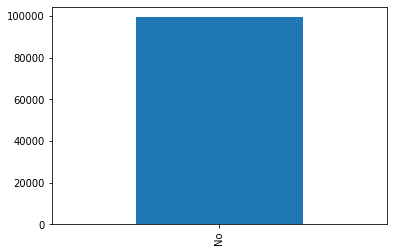

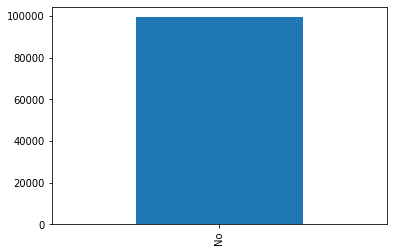

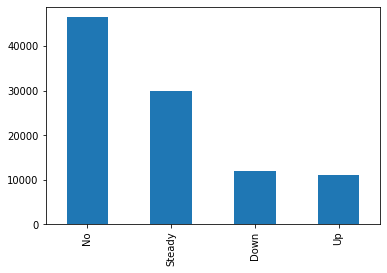

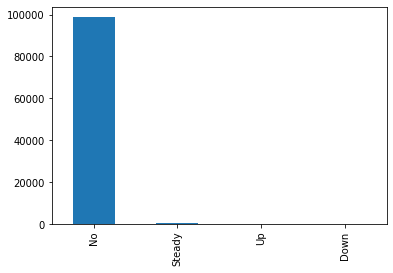

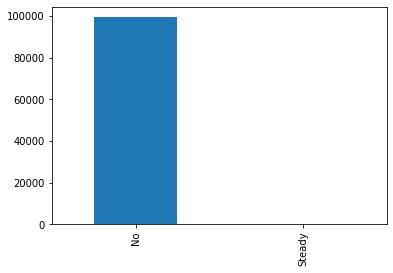

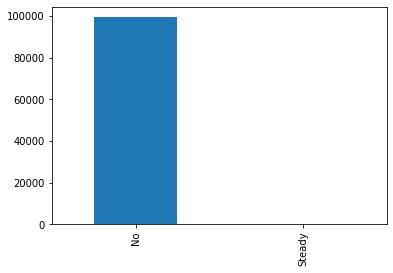

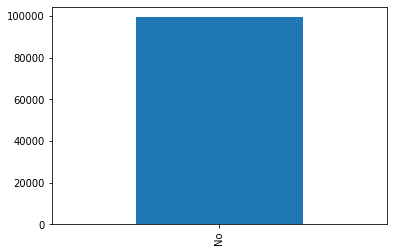

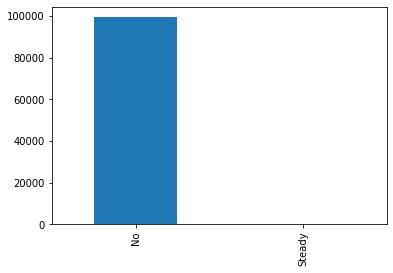

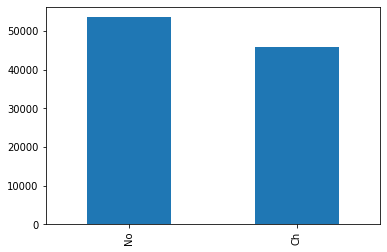

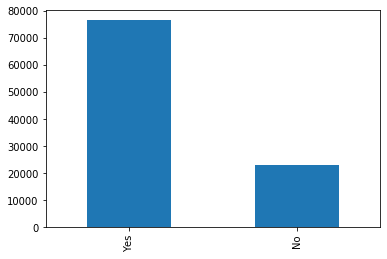

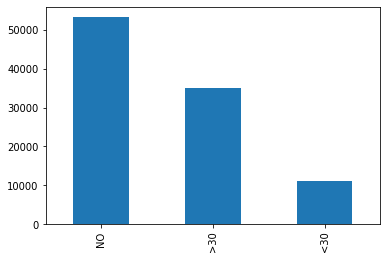

In [18]:
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()

In [19]:
data['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

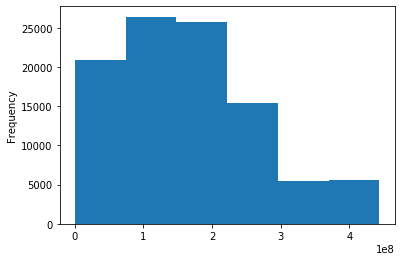

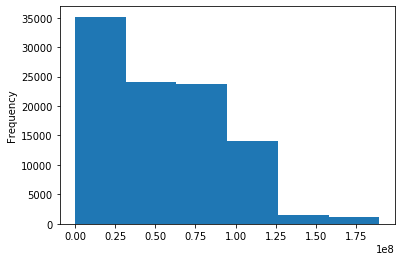

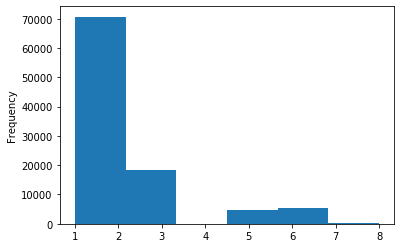

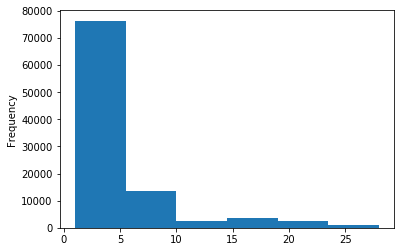

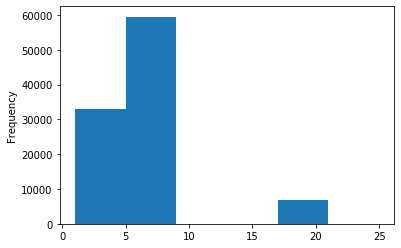

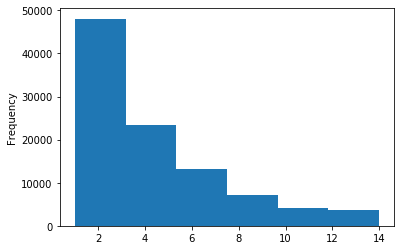

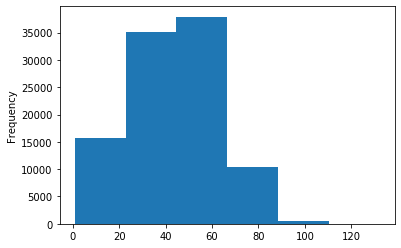

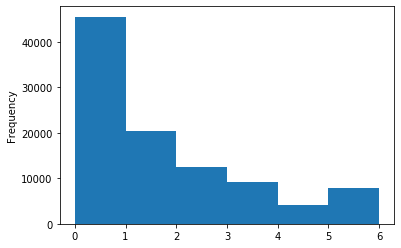

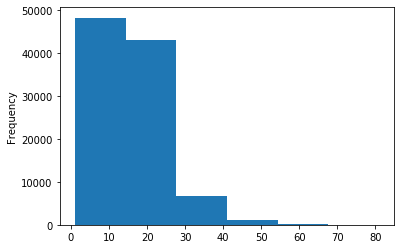

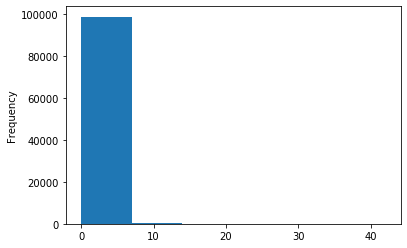

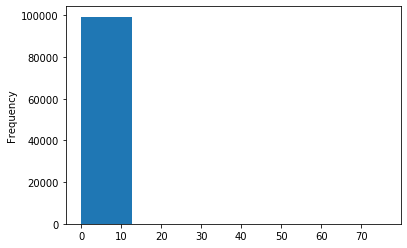

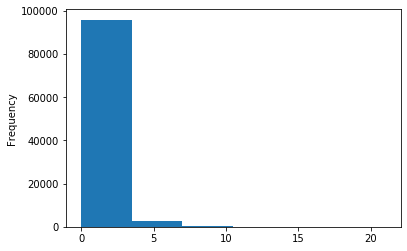

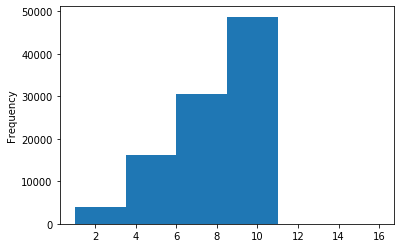

In [20]:
for col in numeric:
    numeric[col].plot.hist(bins=6)
    plt.show()

In [21]:
data.drop(['examide','citoglipton'],axis=1,inplace=True)
data.shape

(99473, 43)

In [22]:
data['total_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

In [23]:
def agecategory(x):
    
    if x == "[0-10)" :
        return 5
    elif x == "[10-20)":
        return 15
    elif x == "[20-30)":
        return 25
    elif x == "[30-40)":
        return 35
    elif x == "[40-50)":
        return 45
    elif x == "[50-60)":
        return 55
    elif x == "[60-70)":
        return 65
    elif x == "[70-80)":
        return 75
    else:
        return 0

In [24]:
data['age'] = data['age'].apply(lambda x: agecategory(x))

In [25]:
data['age'][:10]

0     5
1    15
2    25
3    35
4    45
5    55
6    65
7    75
8     0
9     0
Name: age, dtype: int64

In [26]:
treatments = ['metformin' ,'repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide' ,'glipizide',\
              'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose' ,'miglitol' ,'troglitazone', \
              'tolazamide', 'insulin' ,'glyburide-metformin','glipizide-metformin', \
              'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [27]:
print(treatments)

['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [28]:
for i in treatments:
    data[i] = data[i].apply(lambda x: 0 if x == "No" else 1)

In [29]:
data['treatments_taken'] = np.zeros((len(data['metformin'])))
for col in treatments:
    data['treatments_taken'] += data[col]

In [30]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_visits,treatments_taken
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,41,...,0,0,0,0,0,No,No,NO,0,0.0
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,...,0,0,0,0,0,Ch,Yes,>30,0,1.0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,...,0,0,0,0,0,No,Yes,NO,3,1.0
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,...,0,0,0,0,0,Ch,Yes,NO,0,1.0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,...,0,0,0,0,0,Ch,Yes,NO,0,2.0


In [31]:
data['A1Cresult'] = data['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )

In [32]:

def getCategor(x):
    if 'V' in str(x) or 'E' in str(x):
        return 0
    
    x = float(x)
    
    if (x >= 390 and x <= 459) or np.floor(x) == 785:
        return 1
    elif (x >= 460 and x <= 519) or np.floor(x) == 786:
        return 2
    elif (x >= 520 and x <= 579) or np.floor(x) == 787:
        return 3
    elif np.floor(x) == 250:
        return 4
    elif x >= 800 and x <= 999:
        return 5
    elif x >= 710 and x <= 739:
        return 6
    elif (x >= 580 and x <= 629) or np.floor(x) == 788:
        return 7
    elif x >= 140 and x <= 239:
        return 8
    else:
        return 0

In [33]:
data['diag_1_category'] = data['diag_1'].apply(lambda x: getCategor(x))

In [34]:
data['diag_1_category'][:10]

0    4
1    0
2    0
3    0
4    8
5    1
6    1
7    1
8    1
9    1
Name: diag_1_category, dtype: int64

In [35]:
list(data)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'total_visits',
 'treatments_taken',
 'diag_1_category']

In [36]:
patients = data['patient_nbr']
data[patients.isin(patients[patients.duplicated()])]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_visits,treatments_taken,diag_1_category
12,40926,85504905,Caucasian,Female,45,1,3,7,7,60,...,0,0,0,0,Ch,Yes,<30,1,3.0,1
27,248916,115196778,Caucasian,Female,55,1,1,1,2,25,...,0,0,0,0,No,Yes,>30,0,1.0,5
28,250872,41606064,Caucasian,Male,25,2,1,2,10,53,...,0,0,0,0,Ch,Yes,>30,0,1.0,0
32,260166,80845353,Caucasian,Female,75,1,1,7,6,27,...,0,0,0,0,No,Yes,>30,0,1.0,5
33,293058,114715242,Caucasian,Male,65,2,6,2,5,37,...,0,0,0,0,No,Yes,>30,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,65,1,1,7,6,45,...,0,0,0,0,Ch,Yes,>30,6,2.0,0
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,51,...,0,0,0,0,Ch,Yes,>30,0,2.0,4
101762,443847782,74694222,AfricanAmerican,Female,0,1,4,5,5,33,...,0,0,0,0,No,Yes,NO,1,1.0,3
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,53,...,0,0,0,0,Ch,Yes,NO,1,2.0,0


In [37]:
data = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
data.shape

(69658, 46)

In [38]:
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['diag_1_category'] = data['diag_1_category'].astype('object')
data['max_glu_serum'] = data['max_glu_serum'].astype('object')
data['A1Cresult'] = data['A1Cresult'].astype('object')

In [39]:
delete_columns = ['encounter_id','patient_nbr','number_outpatient','number_emergency','number_inpatient',\
                 'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide'\
                  ,'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone' \
                  ,'tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',\
                  'metformin-rosiglitazone','metformin-pioglitazone','diag_1']


In [40]:
data.drop(delete_columns, inplace=True, axis=1)

In [41]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_visits,treatments_taken,diag_1_category
0,Caucasian,Female,5,6,25,1,1,41,0,1,1,0,0,No,No,NO,0,0.0,4
1,Caucasian,Female,15,1,1,7,3,59,0,18,9,0,0,Ch,Yes,>30,0,1.0,0
2,AfricanAmerican,Female,25,1,1,7,2,11,5,13,6,0,0,No,Yes,NO,3,1.0,0
3,Caucasian,Male,35,1,1,7,2,44,1,16,7,0,0,Ch,Yes,NO,0,1.0,0
4,Caucasian,Male,45,1,1,7,1,51,0,8,5,0,0,Ch,Yes,NO,0,2.0,8


In [42]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
categorical=data.select_dtypes(include=['object'])
numeric=data.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

['race' 'gender' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'max_glu_serum' 'A1Cresult' 'change' 'diabetesMed'
 'readmitted' 'diag_1_category']
['age' 'time_in_hospital' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_diagnoses' 'total_visits' 'treatments_taken']


In [44]:
nominal_columns = ['race', 'admission_type_id', 'discharge_disposition_id','admission_source_id' ,'diag_1_category'\
                  , 'max_glu_serum', 'A1Cresult']
dummy_df = pd.get_dummies(data[nominal_columns])
data = pd.concat([data, dummy_df], axis=1)
data = data.drop(nominal_columns, axis=1)

In [45]:
data.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,diag_1_category_5,diag_1_category_6,diag_1_category_7,diag_1_category_8,max_glu_serum_0,max_glu_serum_1,max_glu_serum_2,A1Cresult_0,A1Cresult_1,A1Cresult_2
0,Female,5,1,41,0,1,1,No,No,NO,...,0,0,0,0,1,0,0,1,0,0
1,Female,15,3,59,0,18,9,Ch,Yes,>30,...,0,0,0,0,1,0,0,1,0,0
2,Female,25,2,11,5,13,6,No,Yes,NO,...,0,0,0,0,1,0,0,1,0,0
3,Male,35,2,44,1,16,7,Ch,Yes,NO,...,0,0,0,0,1,0,0,1,0,0
4,Male,45,1,51,0,8,5,Ch,Yes,NO,...,0,0,0,1,1,0,0,1,0,0


In [46]:
data1 = data

In [47]:
data1.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,diag_1_category_5,diag_1_category_6,diag_1_category_7,diag_1_category_8,max_glu_serum_0,max_glu_serum_1,max_glu_serum_2,A1Cresult_0,A1Cresult_1,A1Cresult_2
0,Female,5,1,41,0,1,1,No,No,NO,...,0,0,0,0,1,0,0,1,0,0
1,Female,15,3,59,0,18,9,Ch,Yes,>30,...,0,0,0,0,1,0,0,1,0,0
2,Female,25,2,11,5,13,6,No,Yes,NO,...,0,0,0,0,1,0,0,1,0,0
3,Male,35,2,44,1,16,7,Ch,Yes,NO,...,0,0,0,0,1,0,0,1,0,0
4,Male,45,1,51,0,8,5,Ch,Yes,NO,...,0,0,0,1,1,0,0,1,0,0


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['change']=le.fit_transform(data['change'])
data['diabetesMed']=le.fit_transform(data['diabetesMed'])
data['readmitted']=le.fit_transform(data['readmitted'])

In [49]:
data1['readmitted'].value_counts()

2    41660
1    21833
0     6165
Name: readmitted, dtype: int64

In [50]:
data1['readmitted'] = data1['readmitted'].replace(2, 1)

In [51]:
y = data1['readmitted']

In [52]:
X = data1.drop('readmitted',axis=1)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

In [91]:
from  sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 10, criterion = "entropy",random_state=0)
rfc.fit(x_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [92]:
rfcpred= rfc.predict(x_test)

In [93]:
rfcpred

array([1, 1, 1, ..., 1, 1, 1])

In [94]:
Y_test

8188     1
29720    1
55295    1
16930    1
4914     1
        ..
72710    1
31343    1
55946    1
39005    0
77539    1
Name: readmitted, Length: 13932, dtype: int32

In [95]:
from sklearn.metrics import accuracy_score
rfcacc = accuracy_score(Y_test,rfcpred)
rfcacc

0.9047516508756819

In [96]:
from sklearn.metrics import confusion_matrix
rfccm = confusion_matrix(Y_test,rfcpred)
rfccm

array([[   22,  1242],
       [   85, 12583]], dtype=int64)

In [97]:
Y_test.shape

(13932,)

In [98]:
import sklearn.metrics as metrics
rfcfpr,rfctpr,threshold=metrics.roc_curve(Y_test,rfcpred)
rfcroc_auc=metrics.auc(rfcfpr,rfctpr)

Text(0, 0.5, 'tpr')

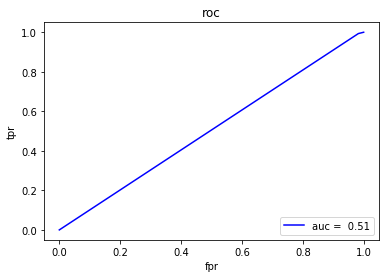

In [99]:
import matplotlib.pyplot as plt
plt.plot(rfcfpr,rfctpr,"b",label='auc = % 0.2f'%rfcroc_auc)
plt.legend(loc="lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [64]:
low_importance_features = ['diag_1_category_8','admission_source_id_4', 'discharge_disposition_id_2','admission_source_id_17',\
      'discharge_disposition_id_18','admission_type_id_5','discharge_disposition_id_5','race_Hispanic',\
      'max_glu_serum_0', 'max_glu_serum_2', 'race_Other', 'admission_source_id_6','max_glu_serum_1',\
      'admission_source_id_2','discharge_disposition_id_4','admission_source_id_5', 'race_Asian', \
      'discharge_disposition_id_28','discharge_disposition_id_11','discharge_disposition_id_15',\
      'discharge_disposition_id_25','discharge_disposition_id_7', 'admission_type_id_8', 'admission_source_id_3',\
      'admission_source_id_20','discharge_disposition_id_23','discharge_disposition_id_14','discharge_disposition_id_13',\
      'discharge_disposition_id_8','discharge_disposition_id_16', 'admission_source_id_9', 'discharge_disposition_id_9','discharge_disposition_id_24',\
      'admission_type_id_4','admission_type_id_7','admission_source_id_10','discharge_disposition_id_19','discharge_disposition_id_17',\
      'admission_source_id_8','discharge_disposition_id_16','admission_source_id_25','discharge_disposition_id_10','discharge_disposition_id_20',\
      'admission_source_id_13','admission_source_id_11','admission_source_id_22','admission_source_id_14',\
      'discharge_disposition_id_27','discharge_disposition_id_12']

In [65]:
data_final = data1.drop(low_importance_features, axis = 1)

In [66]:
data_final

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,readmitted,...,diag_1_category_1,diag_1_category_2,diag_1_category_3,diag_1_category_4,diag_1_category_5,diag_1_category_6,diag_1_category_7,A1Cresult_0,A1Cresult_1,A1Cresult_2
0,0,5,1,41,0,1,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,15,3,59,0,18,9,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,0,25,2,11,5,13,6,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,1,35,2,44,1,16,7,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,1,45,1,51,0,8,5,0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,0,75,9,50,2,33,9,0,1,1,...,0,0,1,0,0,0,0,0,0,1
101755,0,45,14,73,6,26,9,0,1,1,...,0,0,0,0,0,0,1,0,0,1
101756,0,65,2,46,6,17,9,1,1,1,...,0,0,0,0,1,0,0,1,0,0
101758,0,0,5,76,1,22,9,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [67]:
y = data_final['readmitted']

In [68]:
X = data_final.drop('readmitted',axis=1)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,criterion="entropy")
dtc.fit(x_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
dtcpred=dtc.predict(x_test)

dtcpred

array([1, 0, 1, ..., 1, 1, 0])

In [73]:
Y_test

8188     1
29720    1
55295    1
16930    1
4914     1
        ..
72710    1
31343    1
55946    1
39005    0
77539    1
Name: readmitted, Length: 13932, dtype: int32

In [74]:
from sklearn.metrics import accuracy_score
dtcacc=accuracy_score(Y_test,dtcpred)

dtcacc

0.8263709445879989

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,dtcpred)
cm

array([[  163,  1101],
       [ 1318, 11350]], dtype=int64)

In [76]:
Y_test.shape

(13932,)

In [77]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(Y_test,dtcpred)
roc_auc=metrics.auc(fpr,tpr)


Text(0, 0.5, 'tpr')

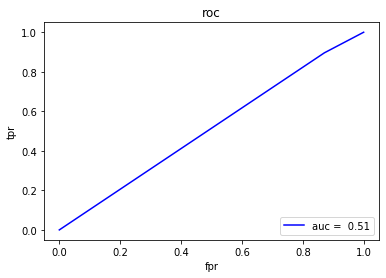

In [78]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,"b",label='auc = % 0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [79]:
from sklearn.model_selection import cross_val_score

performance = []
for max_depth in [2,3,5,7,10]:
    dTree = DecisionTreeClassifier(criterion='entropy', class_weight = "balanced", max_depth=max_depth)
    performance.append((max_depth, np.mean(cross_val_score(dTree, X_train, Y_train, cv = 10, scoring = "f1_micro"))))

In [80]:
print(performance)
print("The best tree size is: ") 
str(sorted(performance, key = lambda x: x[1])[-1][0])

[(2, 0.516688441438177), (3, 0.5426009369345509), (5, 0.6162823744211303), (7, 0.603579865825758), (10, 0.5794968697786438)]
The best tree size is: 


'5'

In [81]:
X_train

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,total_visits,...,diag_1_category_1,diag_1_category_2,diag_1_category_3,diag_1_category_4,diag_1_category_5,diag_1_category_6,diag_1_category_7,A1Cresult_0,A1Cresult_1,A1Cresult_2
31092,0,75,4,64,0,20,9,1,0,0,...,1,0,0,0,0,0,0,0,1,0
27418,0,0,3,37,1,24,9,1,1,1,...,0,0,0,0,0,1,0,1,0,0
69101,1,0,3,59,0,10,9,0,1,2,...,0,1,0,0,0,0,0,1,0,0
29607,1,65,3,29,1,20,4,1,1,0,...,0,0,0,0,0,1,0,1,0,0
58441,1,0,8,55,2,33,9,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50019,0,75,1,26,0,9,7,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7682,1,45,2,49,3,11,5,1,1,0,...,1,0,0,0,0,0,0,1,0,0
77229,0,65,14,64,5,29,9,0,1,0,...,0,1,0,0,0,0,0,1,0,0
941,0,75,6,49,0,6,9,1,1,0,...,1,0,0,0,0,0,0,0,1,0


In [82]:
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression()
lsr.fit(x_train,Y_train)

LogisticRegression()

In [83]:
import pickle
pickle.dump(lsr,open('readmission.pkl','wb'))

In [84]:
lsrpred=lsr.predict(x_test)
lsrpred

array([1, 1, 1, ..., 1, 1, 1])

In [85]:
Y_test

8188     1
29720    1
55295    1
16930    1
4914     1
        ..
72710    1
31343    1
55946    1
39005    0
77539    1
Name: readmitted, Length: 13932, dtype: int32

In [86]:
lsracc=accuracy_score(Y_test,lsrpred)
lsracc

0.9089147286821705

In [87]:
lsrcm = confusion_matrix(Y_test,lsrpred)

lsrcm

array([[    0,  1264],
       [    5, 12663]], dtype=int64)

In [88]:
import sklearn.metrics as metrics
lsrfpr,lsrtpr,threshold=metrics.roc_curve(Y_test,lsrpred)
lsrroc_auc=metrics.auc(lsrfpr,lsrtpr)

Text(0, 0.5, 'tpr')

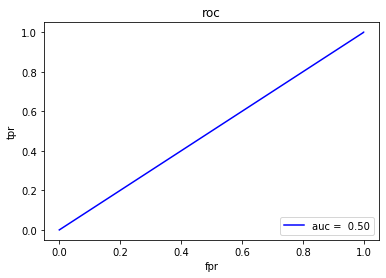

In [89]:
import matplotlib.pyplot as plt
plt.plot(lsrfpr,lsrtpr,"b",label='auc = % 0.2f'%lsrroc_auc)
plt.legend(loc="lower right")
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [100]:
rfc_P = rfc.predict(sc.transform([[0,23,50,1,20,4,1,1,1,1,0.0,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1]])) 

rfc_P

array([1])

In [ ]:
dtcr=dtc.predict(sc.fit_transform([[0,23,50,1,20,4,1,1,1,1,0.0,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1]])) 

dtcr

In [ ]:
lsr_P=lsr.predict(sc.fit_transform([[0,23,50,1,20,4,1,1,1,1,0.0,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1]])) 

lsr_P